In [1]:
import numpy as np
import matplotlib.pyplot as plt

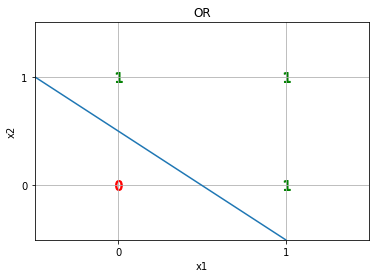

In [2]:
figOR = plt.figure()
plt.ylim(-0.5,1.5)
plt.xlim(-0.5,1.5)
plt.grid(b=True,which="major")
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("OR")
x = [0,1,1]
y = [1,1,0]
plt.scatter(x,y,marker="$1$",color="green", s=100)
plt.scatter([0],[0],marker="$0$",color="red",s=100)
plt.plot([-0.5,1],[1,-0.5])

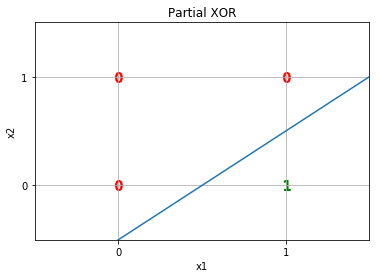

In [3]:
figPartialXor = plt.figure()
plt.ylim(-0.5,1.5)
plt.xlim(-0.5,1.5)
plt.grid(b=True,which="major")
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Partial XOR")
x = [0,0,1]
y = [0,1,1]
plt.scatter(x,y,marker="$0$",color="red", s=100, clip_on=False)
plt.scatter([1],[0],marker="$1$",color="green", s=100, clip_on=False)
plt.plot([-0.5,1.5],[-1,1])

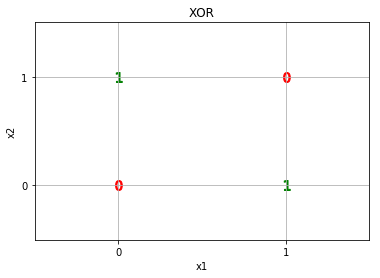

In [4]:
figXor = plt.figure()
plt.ylim(-0.5,1.5)
plt.xlim(-0.5,1.5)
plt.grid(b=True,which="major")
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR")
x = [0,1]
y = [1,0]
plt.scatter(x,y,marker="$1$",color="green", s=100, clip_on=False)
plt.scatter([0,1],[0,1],marker="$0$",color="red", s=100, clip_on=False)

# Binary Classifier

Let's say we have positive and negative examples, and we want to classify them.

/home/arthur/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


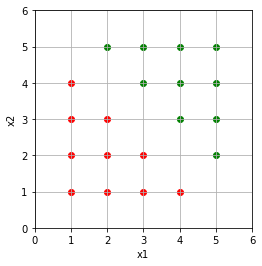

In [5]:
PosNeg = plt.figure()
plt.grid(b=True,which="major")
plt.ylim(0,6)
plt.xlim(0,6)
plt.axes().set_aspect("equal")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter([1,1, 1, 1, 2, 2, 2, 3, 3, 4],[1,2,3,4,1,2,3,1,2,1],color="red")
plt.scatter([2, 3, 3, 4, 4, 4,5,5,5,5],[5,4,5,3,4,5,2,3,4,5],color="green")

The obvious thing to do is to seperate them by a line :

/home/arthur/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


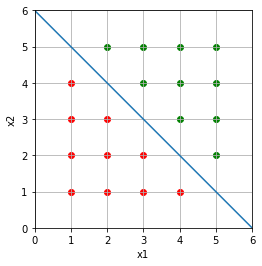

In [6]:
PosNeg = plt.figure()
plt.grid(b=True,which="major")
plt.ylim(0,6)
plt.xlim(0,6)
plt.axes().set_aspect("equal")
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot([0,6],[6,0])
plt.scatter([1,1, 1, 1, 2, 2, 2, 3, 3, 4],[1,2,3,4,1,2,3,1,2,1],color="red")
plt.scatter([2, 3, 3, 4, 4, 4,5,5,5,5],[5,4,5,3,4,5,2,3,4,5],color="green")


Ok, nice, but how do we actually know that an example is a positive or a negative one ?

Weeeeellll, using maths !

/home/arthur/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


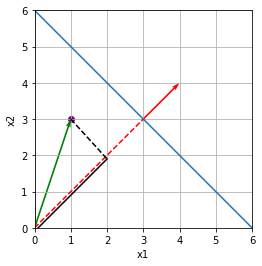

In [7]:

figDotProduct = plt.figure()
plt.grid(b=True,which="major")
plt.ylim(0,6)
plt.xlim(0,6)
plt.axes().set_aspect("equal")
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot([0,6],[6,0])
plt.scatter([1],[3],color="purple")
plt.quiver([3], [3], [1], [1], angles='xy', scale_units='xy', scale=1,color="red")
plt.quiver([0], [0], [1], [3], angles='xy', scale_units='xy', scale=1,color="green")
plt.plot([0,3],[0,3],"r--")
plt.plot([1,2],[3,1.9],"k--")
plt.plot([0,2],[-0.1,1.9],"k")

Let's say we have positive and negative examples seperate by the blue line of equation : $x2 = -x1 + 6$. Note that this line has a direction vector $ \mathbf{d} = \begin{pmatrix}1\\-1\end{pmatrix}$. From this vector we can easily find a normal vector (red vector) :  $\mathbf{w} = \begin{pmatrix}1\\1\end{pmatrix}$

We want to classify the purple sample. This sample can be represented by the green vector :

$$\mathbf{x} = \begin{pmatrix}x1\\x2\end{pmatrix}$$

To classify this sample, the idea is to project $\mathbf{x}$ (the green vector) on $\mathbf{w}$ (the red vector) to obtain the solid black segment of length $l$ :

$$l = \|\mathbf{x}\| \cdot \cos(\mathbf{w},\mathbf{x})$$

From the dot product definition we know that :

$$\mathbf{w} \cdot \mathbf{x} = \|\mathbf{w}\| \cdot \|\mathbf{x}\| \cdot \cos(\mathbf{w},\mathbf{x}) = \|\mathbf{w}\| \cdot l$$

We can rewrite $l$ as :

$$l = \frac{\mathbf{w} \cdot \mathbf{x}}{\| \mathbf{w} \|}$$

Because $\mathbf{w}$ is a unit vector, we can finally write :

$$l = \mathbf{w} \cdot \mathbf{x}$$

To determine if an example is positive or negative, we just need to look if it's bellow or above the line. So we just need to compare $l$ to the length of the red dashed line ($b$).

$$
\begin{cases}
1 & \text{ if } l\geq b \\ 
0 & \text{ if } l < b 
\end{cases}
$$

or

$$
\begin{cases}
1 & \text{ if } l-b\geq0 \\ 
0 & \text{ if } l-b < 0 
\end{cases}
$$

To write this down in a single equation, we can use the "Heaviside step function" defined by :

$$
\mathcal{H}(t) = 
\begin{cases}
1 & \text{ if } t \geq 0 \\ 
0 & \text{ if } t < 0 
\end{cases}
$$

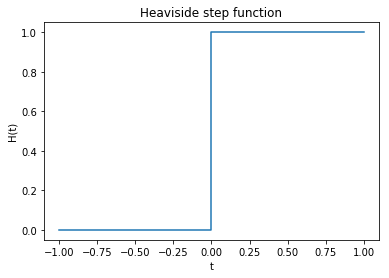

In [8]:
heaviside = plt.figure()
plt.title("Heaviside step function")
plt.xlabel("t")
plt.ylabel("H(t)")
plt.step([-1,0,0.1,1],[0,0,1,1])

If we replace $t$ by $l-b$ we obtain:

$$y = \mathcal{H}(l-b)$$

and with the complete formula:

$$y = \mathcal{H}(\mathbf{x} \cdot \mathbf{w}-b)$$

And there we go, we have a linear binary classifier.

In a case of linearly seperable classes

### the learning process

